In [140]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [141]:
def system(t, Y, sigma, r, b):
    '''
    Lorenz' 3 equations describing the behaviour of Earth's atmosphere
    Ẋ = σ(Y - X)
    Ẏ = rX - Y - XZ
    Ż = - bZ + XY
    where σ is the Prandtl number, r is the Rayleigh number, and b is a dimensionless length scale.
    '''
    x, y, z = Y
    return [-sigma*(x - y), r * x - y - x * z, -b * z + x * y]

W_0 = [0.0, 1.0, 0.0]
t_span = [0.0, 60]
t_eval = np.linspace(0, 60, 1000)
delta_t = 0.01

Text(0, 0.5, 'Amplitude')

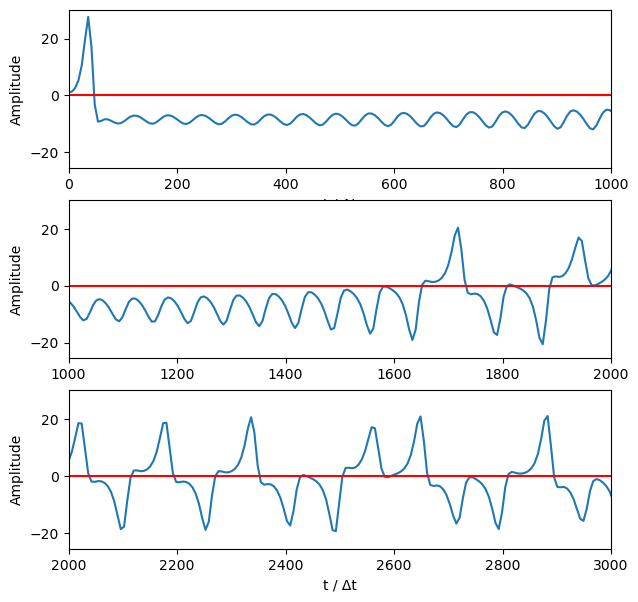

In [142]:
soln2 = solve_ivp(fun = system, t_span = t_span, y0 = W_0, args = (10., 28, 8./3.), t_eval = t_eval, dense_output=True)
'''
Solution to the differential equation "system" using the solve_ivp method. The solution for Y is then plotted over time / Δt in 3 subplots. 1 from t/Δt [0,1000], [1000, 2000],
and [2000, 3000].
'''

f,ax = plt.subplots(3,1,figsize=(7,7))

ax[0].plot(soln2.t / delta_t, soln2.y[1])
ax[0].axhline(y = 0, color = 'r', linestyle = '-')
ax[0].set_xlim(0, 1000)

ax[1].plot(soln2.t / delta_t, soln2.y[1])
ax[1].axhline(y = 0, color = 'r', linestyle = '-')
ax[1].set_xlim(1000, 2000)

ax[2].plot(soln2.t / delta_t, soln2.y[1])
ax[2].axhline(y = 0, color = 'r', linestyle = '-')
ax[2].set_xlim(2000, 3000)

ax[0].set_xlabel('t / Δt')
ax[0].set_ylabel('Amplitude')
ax[1].set_xlabel('t / Δt')
ax[1].set_ylabel('Amplitude')
ax[2].set_xlabel('t / Δt')
ax[2].set_ylabel('Amplitude')


In [143]:
t = np.linspace(14, 19, 1000) #Smaller time interval to observe the solutions projected on the X-Y and Y-Z plane.
W =soln2.sol(t) #Solution resolved with new time interval

Text(0, 0.5, 'X')

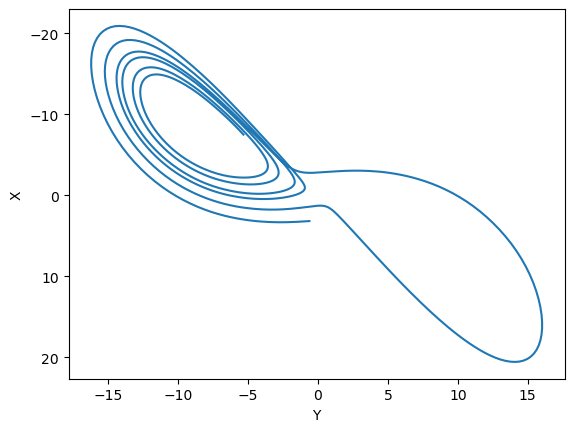

In [144]:
plt.plot(W[0], W[1]) #Solution with smaller time interval graphed on the X-Y Plane.
plt.gca().invert_yaxis()
plt.xlabel('Y')
plt.ylabel('X')


Text(0, 0.5, 'Z')

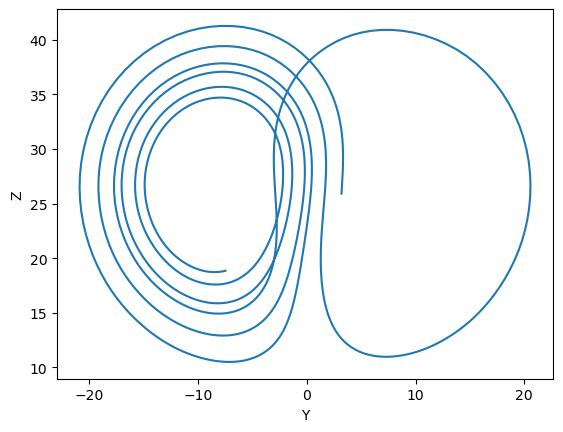

In [145]:
plt.plot(W[1], W[2]) #Solution with smaller time interval graphed on the Z-Y Plane.
plt.xlabel('Y')
plt.ylabel('Z')

In [146]:
addition = [0., 1.e-8, 0]
W0_prime = []
'''
Adding difference in initial conditions
'''

for int in range(0, 3):
    W0_prime.append(W_0[int] + addition[int])

In [147]:
new_soln2 = solve_ivp(fun = system, t_span = t_span, y0 = W0_prime, args = (10., 28, 8./3.), t_eval = t_eval, dense_output=True) 
#Resolving the differential equation with slightly adapted initial conditions


In [148]:
distance = []
val = 0
'''
Distance between initial and adapted initial value solutions to the differential equation.
'''

while val < 1000:
    distance.append(LA.norm([new_soln2.y[0][val] - soln2.y[0][val], new_soln2.y[1][val] - soln2.y[1][val], new_soln2.y[2][val] - soln2.y[2][val]]))
    val += 1


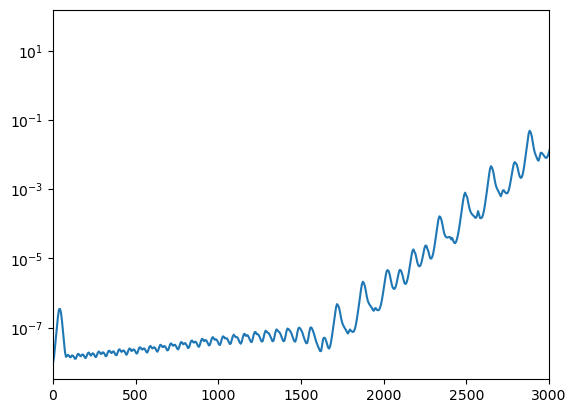

In [150]:
plt.plot(new_soln2.t / delta_t, distance) #Plotting the difference in distance for initial solution and modified solution on a amplitude log scale.
plt.xlim(0, 3000)
plt.yscale('log')